In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../annos/adotto_TRannotations_v1.0_pre-inter-filter.bed.gz", sep='\t')

In [9]:
data.columns = ['chrom', 'start', 'end', 'up_buff', 'dn_buff', 'n_filtered', \
                'n_annos', 'n_subregions', 'mu_purity', 'pct_annotated', 'annos']

[Text(0.5, 0, 'Buffer'), Text(0.5, 1.0, 'Region buffer ECDF')]

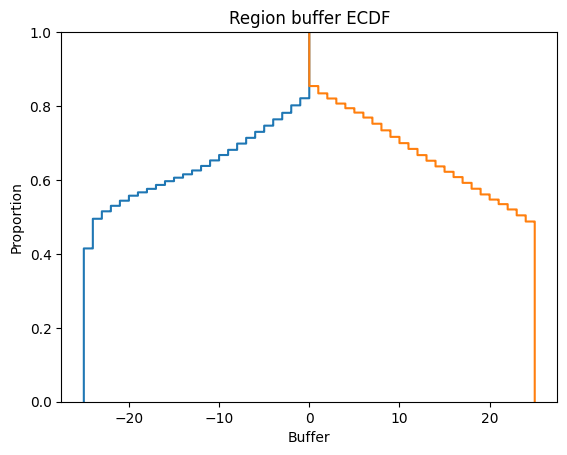

In [47]:
sb.ecdfplot(x=-data['up_buff'])
p = sb.ecdfplot(x=data["dn_buff"], complementary=True)
p.set(xlabel="Buffer", title="Region buffer ECDF")

[Text(0.5, 0, 'Buffer'), Text(0.5, 1.0, 'Region buffer lengths')]

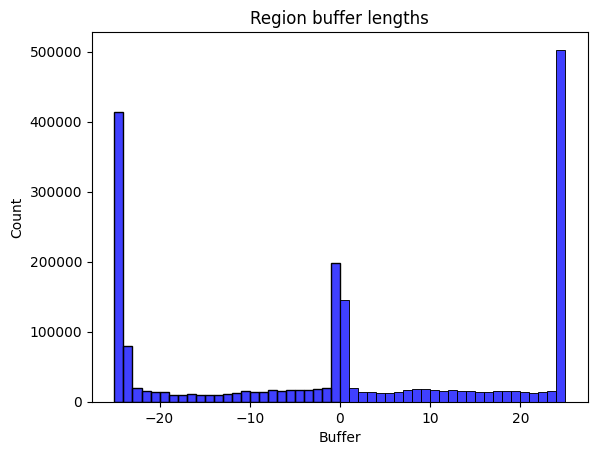

In [113]:
sb.histplot(x=-data['up_buff'], color='blue', binwidth=1)
p = sb.histplot(x=data["dn_buff"], color='blue', binwidth=1)
p.set(xlabel="Buffer", title="Region buffer lengths")

<Figure size 1152x864 with 0 Axes>

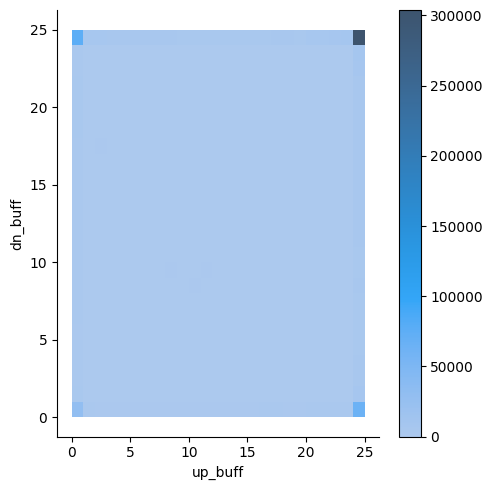

In [35]:
plt.figure(dpi=180)
sb.displot(data=data, x='up_buff', y='dn_buff', binwidth=1, cbar=True)
plt.savefig('dis.pdf')

<Figure size 1152x864 with 0 Axes>

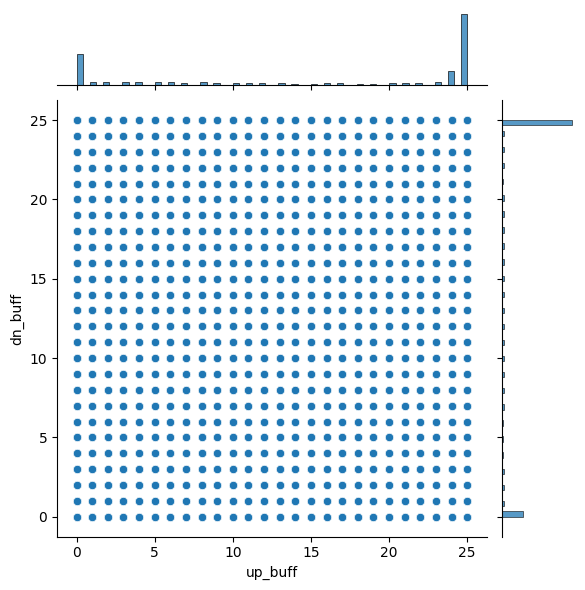

In [36]:
plt.figure(dpi=180)
sb.jointplot(data=data, x='up_buff', y='dn_buff')
plt.savefig('join.pdf')

In [37]:
len(data)

997178

,Min Buffer,Count,Percent
0,5,595212,0.596896
1,10,488784,0.490167
2,20,365574,0.366609
3,25,256711,0.257437


[Text(0.5, 1.0, "Percent of region's non-buffer covered by annotations")]

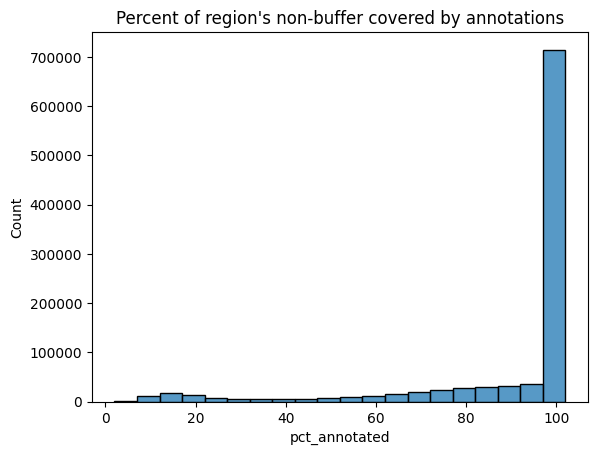

[Text(0.5, 1.0, 'Mean Purity Distribution')]

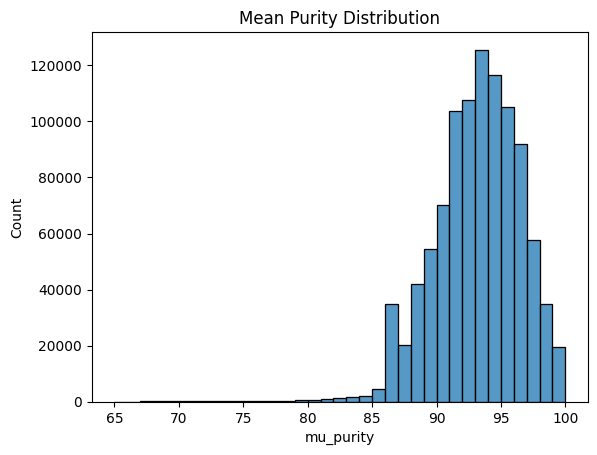

In [62]:
data['n_subregions'].describe()

count    997178.000000
mean          1.603668
std           1.299930
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         191.000000
Name: n_subregions, dtype: float64

In [63]:
data['n_annos'].describe()

count    997178.000000
mean          1.803785
std           2.225366
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         262.000000
Name: n_annos, dtype: float64

In [82]:
from collections import Counter
import json
c = Counter()
categories = []
for i, r in data.iterrows():
    d = json.loads(r['annos'])
    m_set = set()
    for anno in d:
        if 'nested' in anno:
            if anno['nested'] == 0:
                m_set.add("nested_parent")
            else:
                m_set.add("nested")
        if 'iso' in anno:
            m_set.add("iso")
        if 'stag' in anno:
            m_set.add("staggered")
    m_set = sorted(list(m_set))
    key = " ".join(m_set)
    categories.append(key)
    c[" ".join(m_set)] += 1

In [83]:
overlap_summary = pd.Series(c).sort_values(ascending=False).to_frame()
overlap_summary.columns = ['count']
overlap_summary['percent'] = overlap_summary['count'] / len(data)
overlap_summary

,count,percent
iso,576314,0.577945
nested_parent,116870,0.117201
iso staggered,92427,0.092689
iso nested_parent,59427,0.059595
nested_parent staggered,40237,0.040351
iso nested_parent staggered,35755,0.035856
nested nested_parent,25046,0.025117
iso nested nested_parent staggered,19887,0.019943
iso nested nested_parent,15923,0.015968
nested nested_parent staggered,15292,0.015335


In [84]:
data['category'] = categories

[Text(0.5, 1.0, 'Buffer by annotation overlap category'),
 Text(0.5, 0, 'Buffer')]

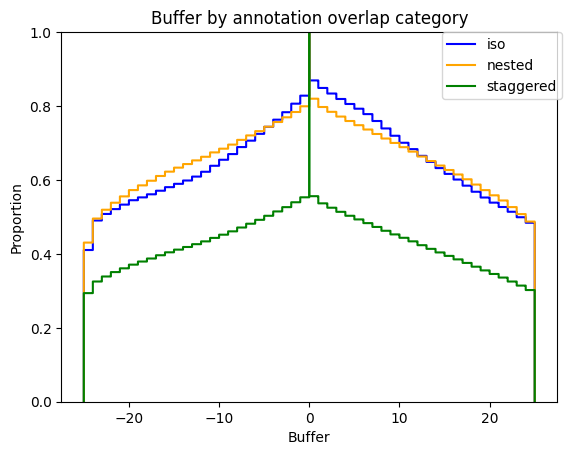

In [107]:
cat_order = ['iso nested_parent', 
             'iso nested nested_parent',
             'nested_parent',
             'nested nested_parent',
             'nested nested_parent staggered',
             'iso staggered',
             'nested_parent staggered',
             'iso nested nested_parent staggered',
             'iso nested_parent staggered',
             'iso']

for i, color in [('iso', 'blue'), ('nested', 'orange'), ('staggered', 'green')]:
    view = data[data['category'].str.contains(i)]
    p = sb.ecdfplot(x=-view["up_buff"], color=color, label=i)
    p = sb.ecdfplot(x=view["dn_buff"], color=color, complementary=True)

plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
p.set(title="Buffer by annotation overlap category", xlabel="Buffer")

[Text(0.5, 1.0, 'Buffer by annotation overlap category'),
 Text(0.5, 0, 'Buffer')]

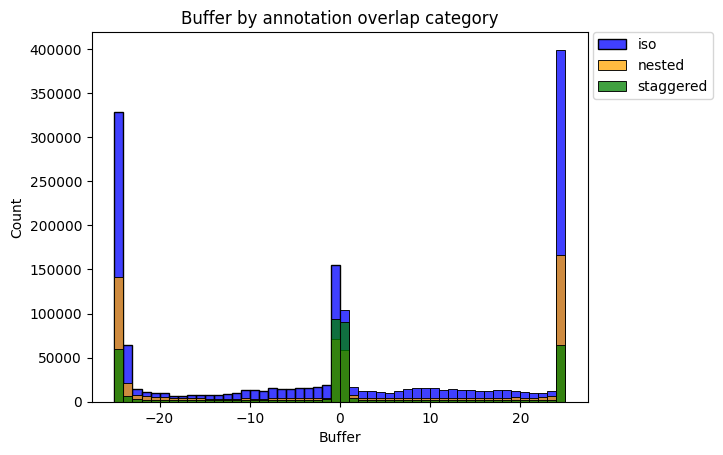

In [114]:
cat_order = ['iso nested_parent', 
             'iso nested nested_parent',
             'nested_parent',
             'nested nested_parent',
             'nested nested_parent staggered',
             'iso staggered',
             'nested_parent staggered',
             'iso nested nested_parent staggered',
             'iso nested_parent staggered',
             'iso']

for i, color in [('iso', 'blue'), ('nested', 'orange'), ('staggered', 'green')]:
    view = data[data['category'].str.contains(i)]
    p = sb.histplot(x=-view["up_buff"], color=color, label=i, binwidth=1, multiple='stack')
    p = sb.histplot(x=view["dn_buff"], color=color, binwidth=1, multiple='stack')

plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
p.set(title="Buffer by annotation overlap category", xlabel="Buffer")

You think there's something with the downstream buffer being longer? Like, is there something in the TR mechanisms where like, it gets 'slippery', then it becomes a TR, but then there's mechanisms to stop the slip?
Or are we just observing something about TRF having a direction bias?. IDK. Could be something, though.

In [ ]:
Think I can add the interspersed annotations first?

In [116]:
from truvari.annotations.repmask import RepMask

data = RepMask.parse_output("../data/first.fasta.out")
def data_to_df(data):
    rows = []
    for key in data:
        if not key.startswith("chr1:"):
            continue
        for item in data[key]:
            item['region'] = key
            rows.append(pd.Series(item))
    return pd.DataFrame(rows)
data = data_to_df(data)
data.set_index("RM_query", inplace=True)

KeyboardInterrupt: 

,chrom,start,end,up_buff,dn_buff,n_filtered,n_annos,n_subregions,mu_purity,pct_annotated,annos,category
0,chr1,16687,16768,25,25,2,1,1,94,100,"[{""chrom"": ""chr1"", ""start"": 16712, ""end"": 1674...",nested_parent
1,chr1,19275,19467,3,25,1,4,2,94,88,"[{""chrom"": ""chr1"", ""start"": 19305, ""end"": 1944...",iso nested nested_parent
2,chr1,20797,20887,0,25,1,1,1,92,100,"[{""chrom"": ""chr1"", ""start"": 20797, ""end"": 2086...",nested_parent
3,chr1,29721,29802,25,25,0,1,1,85,100,"[{""chrom"": ""chr1"", ""start"": 29746, ""end"": 2977...",iso
4,chr1,30829,30987,25,25,0,1,1,92,100,"[{""chrom"": ""chr1"", ""start"": 30854, ""end"": 3096...",iso
...,...,...,...,...,...,...,...,...,...,...,...,...
997173,chrY,56881152,56881235,0,25,2,2,2,96,86,"[{""chrom"": ""chrY"", ""start"": 56881197, ""end"": 5...",iso nested_parent staggered
997174,chrY,56884295,56884465,25,25,2,2,2,94,55,"[{""chrom"": ""chrY"", ""start"": 56884320, ""end"": 5...",iso
997175,chrY,56884637,56884703,0,18,2,2,2,89,100,"[{""chrom"": ""chrY"", ""start"": 56884672, ""end"": 5...",iso staggered
997176,chrY,56885593,56885640,25,0,1,1,1,95,100,"[{""chrom"": ""chrY"", ""start"": 56885618, ""end"": 5...",iso
